In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import ipywidgets 
ipywidgets.__version__


'7.4.2'

In [2]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\survery.csv')
df.head(3)

,Timestamp,Industry,Employees_size,IT_size,team_size,LifeCycle_Software,Software_System,Software_system_architecture,Deployable_Components,Runtime_component_instances,...,alert_rate,alert_percentage,maximum_granularity,retention _policy,reliability_availability,maturity level_improvement,adoption_main_obstacles,survey_useful,additional_comments,Unnamed: 40
0,7-25-2016 15:41:09,Health Care,6 - 20,1 - 5,1 - 5,"Requirement Engineering, Design, Middleware an...",IoT application,"Client-server, Service-oriented architecture (...",11 - 20,21 - 50,...,At least 1 per year,1 - 5%,2 to 10 seconds,Monitoring data is aggregated at different gra...,All or some of the monitoring components are m...,We are always improving it,"There are too many tools, Lack of standardizat...",Yes,NaN,NaN
1,7-25-2016 16:14:13,Technology,"501 - 2,000",101 - 500,6 - 20,System administration and operation management,Entertainment,Service-oriented architecture (SOA),> 100,"2,001 - 10,000",...,More than 100 per day,6 - 20%,One second,Monitoring data is aggregated at different gra...,All or some of the monitoring components are m...,We are always improving it,"Lack of automation, Tools are hard to use and ...",No,NaN,NaN
2,7-25-2016 21:09:17,Technology,21 - 100,21 - 100,6 - 20,System administration and operation management,Product engineering software,Monolithic architecture,1 - 3,1 - 5,...,1 - 20 per day,6 - 20%,Over 1 minute,Monitoring data is stored as raw data forever,Monitoring components are replicated or distri...,"Yes, we plan to improve it in the next future","Lack of standardization, Current tools are not...",Yes,NaN,NaN


In [3]:
df.columns

Index(['Timestamp', 'Industry', 'Employees_size  ', ' IT_size', 'team_size',
       'LifeCycle_Software', 'Software_System', 'Software_system_architecture',
       'Deployable_Components', ' Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'problem_discover  ',
       'Incident_first_check_metrics', ' Most_common_incident ',
       'Incidents_require_manual_ intervention', 'managed_incidents',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'Deployment_techniques', 'third_party_tools ',
       'new_component_in production', 'monitoring_information_access',
       'alert_receiver', 'receive_alerts_employees', 'alert_rate',
       ' alert_percentage', 'maximum_granularity ', ' retention _policy',
       'reliability_availability', 'maturity level_improvement'

# setting Mispelt column names

In [4]:
    ###############################################################
    df['Employees_size']=df['Employees_size  ']
    df['Component_Communication_Styles']=df['Component_Communication_Styles ']
    df['maximum_granularity']=df['maximum_granularity ']
    df['retention_policy']=df[' retention _policy']
    df['Most_common_incident']=df[' Most_common_incident ']
    df['alert_percentage']=df[' alert_percentage']
    df['IT_size']=df[' IT_size']
    df['Runtime_component_instances']=df[' Runtime_component_instances']
    df['Computing_Model_Layers']=df['Computing_Model_Layers ']
    df['System_load_user_requests']=df['System_load_ user_requests']
    
df.drop(['Employees_size  ','Component_Communication_Styles ','maximum_granularity ', ' retention _policy',' Most_common_incident ',' alert_percentage',' IT_size',' Runtime_component_instances','Computing_Model_Layers ','System_load_ user_requests'],axis=1,inplace=True)
 
#df_subset.apply(pd.Series.value_counts)    

# Missing Values Imputation

In [5]:
df[df['team_size'].isna()]
df['team_size'].fillna('6 - 20',inplace=True)
df['team_size'].head(10)
df['Release_automation_rate'].fillna('3.0',inplace=True)
df['upgrades_release rate'].fillna('At least 1 release per month',inplace=True)
df['observability_rate'].fillna('3.0',inplace=True)
df['receive_alerts_employees'].fillna('2.0',inplace=True)
df['System_load_user_requests'].fillna('11 - 100',inplace=True)
df['Incidents_number_history'].fillna('1 - 5',inplace=True)
df['unavailability_time'].fillna('Less than 1 hour',inplace=True)
df['alert_rate'].fillna('1 - 20 per day',inplace=True)
df['alert_percentage'].fillna('1 - 5%',inplace=True)
df['maximum_granularity'].fillna('Over 1 minute',inplace=True)
df['retention_policy'].fillna('Monitoring data is aggregated at different granularities based on its aging',inplace=True)
df['Computing_Model_Layers'].fillna('Virtual machines (IaaS)',inplace=True) 
df['LifeCycle_Software'].fillna('Development',inplace=True) 
df['Component_Communication_Styles'].fillna('Request/response synchronous communication',inplace=True)
df['Deployment_techniques'].fillna('Manual checks via terminal (e.g.: ping, ssh, logs grepping)',inplace=True)
df['new_component_in production'].fillna('It is released with no monitoring or relying on the existing monitoring configuration',inplace=True) 



# Needed columns for analysis

In [6]:
df_cdf = df[[ 'Employees_size', 'IT_size', 'team_size','Deployable_Components', 'Runtime_component_instances', 'Release_automation_rate','upgrades_release rate', 'System_load_user_requests','observability_rate', 'Incidents_number_history', 'unavailability_time','receive_alerts_employees', 'alert_rate','alert_percentage', 'maximum_granularity', 'retention_policy']]

df_ndf = df[['Industry','Computing_Model_Layers','LifeCycle_Software', 'Software_System', 'Software_system_architecture','Deployment_techniques','Component_Communication_Styles','Most_common_incident','new_component_in production','Deployed_on'] ]


In [7]:
df_cdf.isna().sum()


Employees_size                 0
IT_size                        0
team_size                      0
Deployable_Components          0
Runtime_component_instances    0
Release_automation_rate        0
upgrades_release rate          0
System_load_user_requests      0
observability_rate             0
Incidents_number_history       0
unavailability_time            0
receive_alerts_employees       0
alert_rate                     0
alert_percentage               0
maximum_granularity            0
retention_policy               0
dtype: int64

In [8]:
df_ndf.isna().sum()

Industry                          0
Computing_Model_Layers            0
LifeCycle_Software                0
Software_System                   0
Software_system_architecture      0
Deployment_techniques             0
Component_Communication_Styles    0
Most_common_incident              0
new_component_in production       0
Deployed_on                       0
dtype: int64

# Visual Representation of features

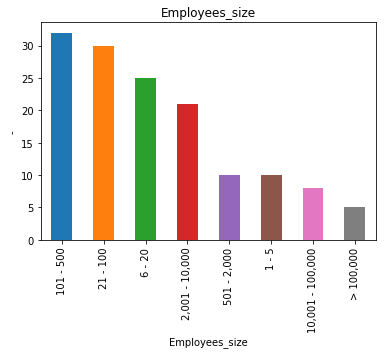

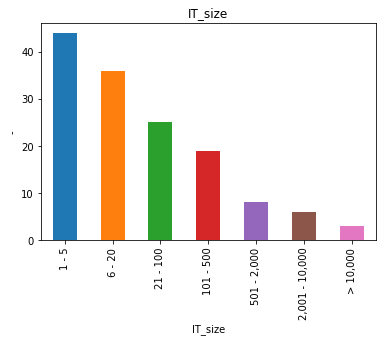

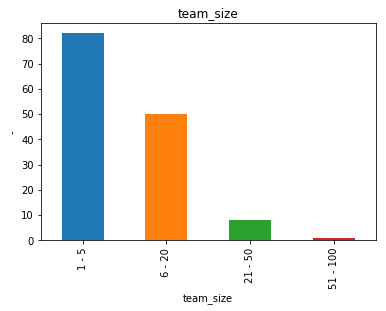

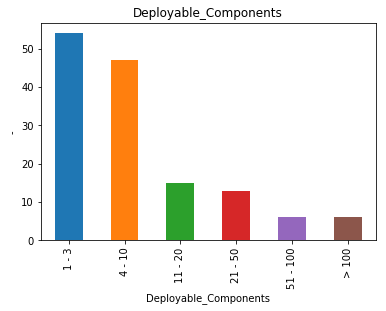

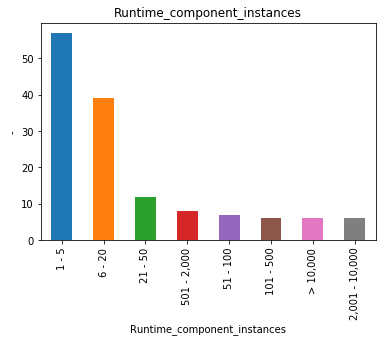

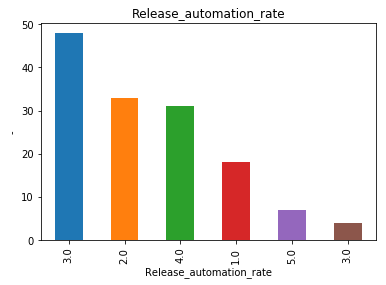

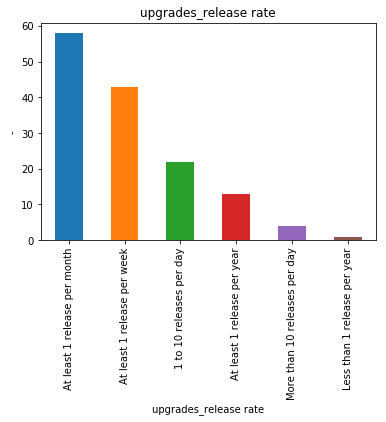

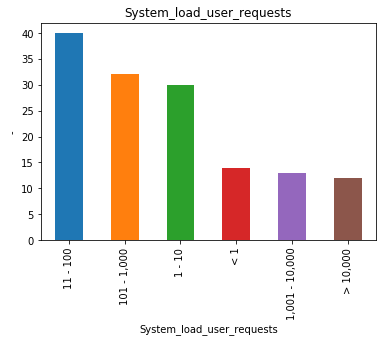

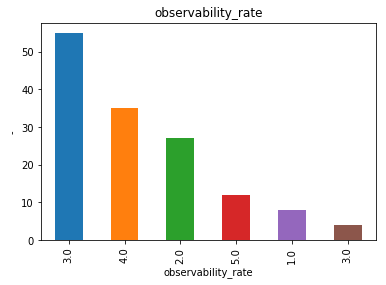

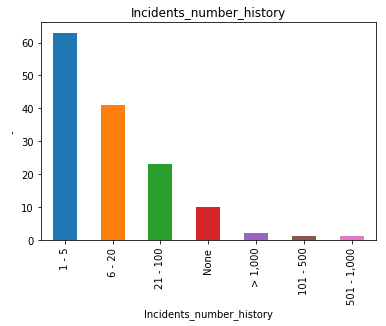

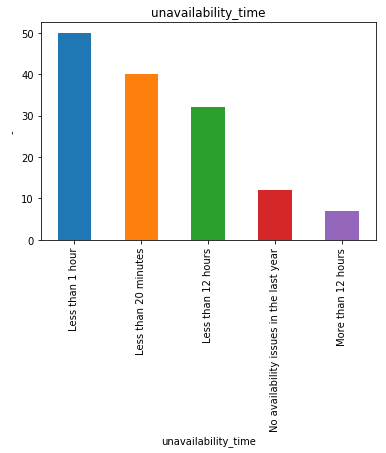

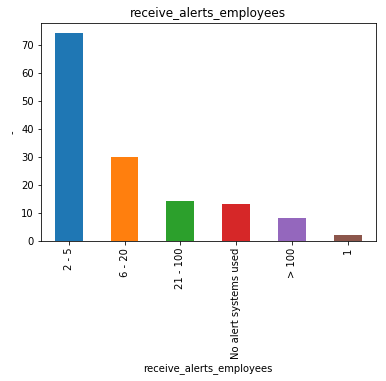

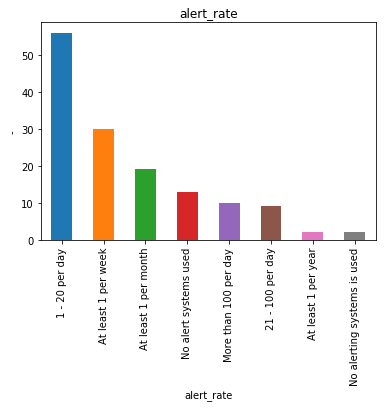

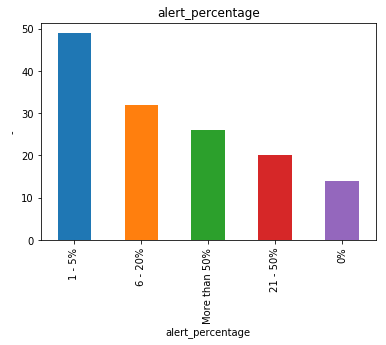

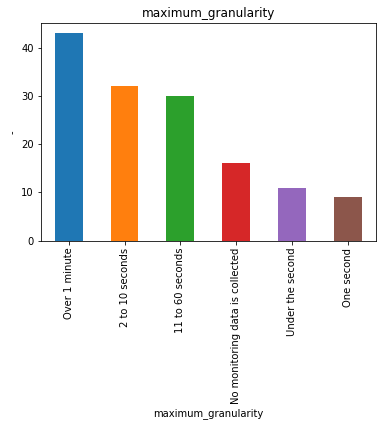

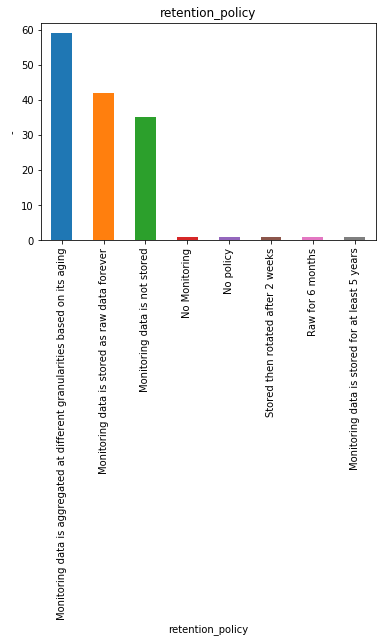

In [9]:
for column in df_cdf:
    
    if len(list(df_cdf[column].unique())) <= 10:
        labels=df_cdf[column].value_counts().index
        df_cdf[column].value_counts().head(8).plot.bar()
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()


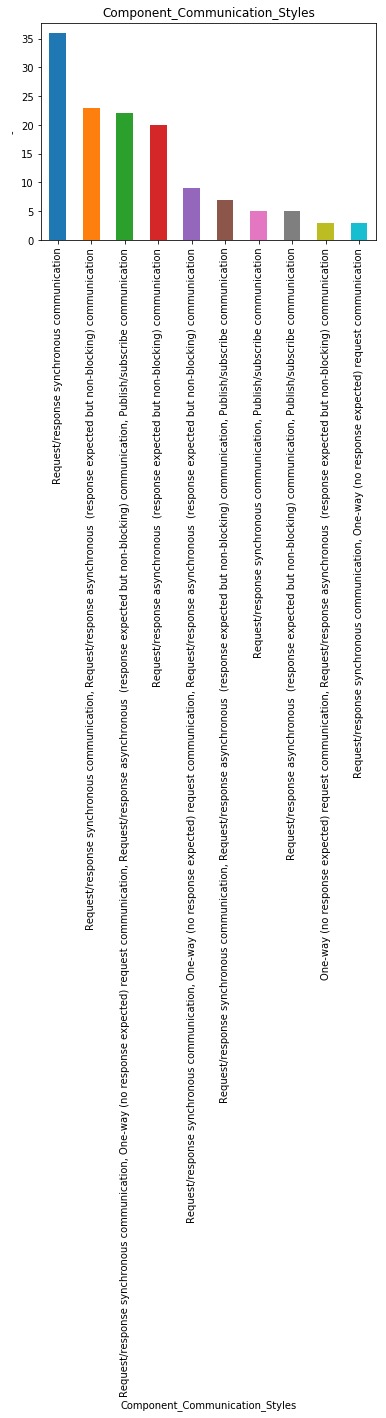

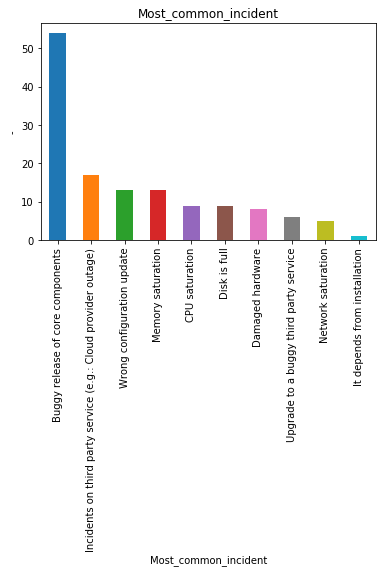

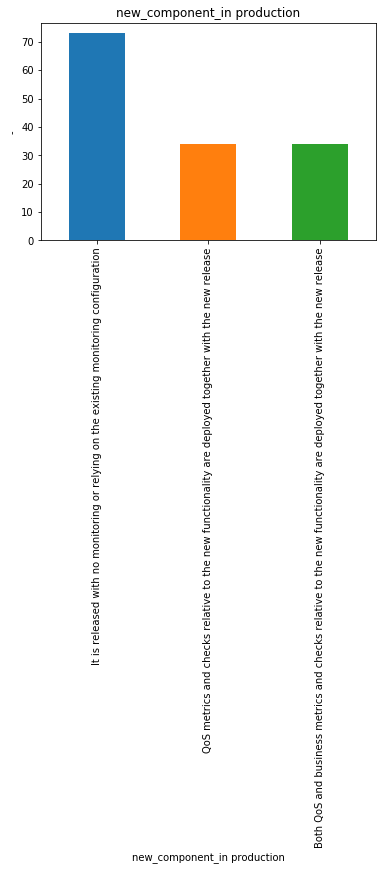

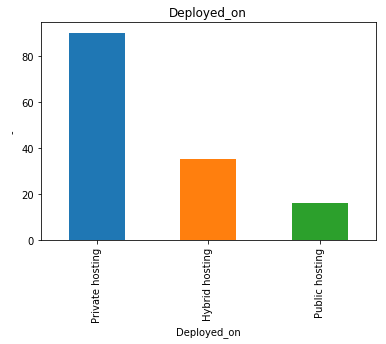

In [10]:
for column in df_ndf:
    
    if len(list(df_ndf[column].unique())) <= 20:
        labels=df_ndf[column].value_counts().index
        df_ndf[column].value_counts().head(10).plot.bar()
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()

# splittting the string and only first column is preferred

In [11]:
arr=[]
arr= df['LifeCycle_Software'].str.split(",", n = 3,expand = True)
df.drop(['LifeCycle_Software'],axis=1,inplace=True)
df['LifeCycle_Software']=arr[0]

arr1=[]
arr1= df['Software_system_architecture'].str.split(",", n = 3, expand = True)
df.drop(['Software_system_architecture'],axis=1,inplace=True)
df['Software_system_architecture']=arr1[0]
df.head()
arr=[]
arr= df['Computing_Model_Layers'].str.split(",", n = 3, expand = True)
df.drop(['Computing_Model_Layers'],axis=1,inplace=True)
df['Computing_Model_Layers']=arr[0]

#df['Component_Communication_Styles '].value_counts()[0:10]
arr=[]
arr= df['Component_Communication_Styles'].str.split(",", n = 3, expand = True)
df.drop(['Component_Communication_Styles'],axis=1,inplace=True)
df['Component_Communication_Styles']=arr[0]

arr=[]
arr= df['Deployment_techniques'].str.split(",", n = 3, expand = True)
df.drop(['Deployment_techniques'],axis=1,inplace=True)
df['Deployment_techniques']=arr[0]
###################



# Encoding the categorical variables using map function

In [12]:
#data["class"] = data["class"].map({'p': 1, 'e': 2})
df['Employees_size']=df['Employees_size'].map({'1 - 5' :1,'6 - 20':2,'21 - 100':3,'101 - 500':4,'501 - 2,000':5,'2,001 - 10,000':6,'10,001 - 100,000':7,'> 100,000':8})
df['IT_size']=df['IT_size'].map({'1 - 5' :1,'6 - 20':2,'21 - 100':3,'101 - 500':4,'501 - 2,000':5,'2,001 - 10,000':6,'> 10,000':7})
df['team_size']=df['team_size'].map({'1 - 5' :1,'6 - 20':2,'21 - 50':3,'51 - 100':4})
df['Runtime_component_instances']=df['Runtime_component_instances'].map({'1 - 5' :1,'6 - 20':2,'21 - 50':3,'51 - 100':4,'101 - 500':5,'501 - 2,000':6,'2,001 - 10,000':7,'> 10,000':8})
df['Deployable_Components']=df['Deployable_Components'].map({'1 - 3' :1,'4 - 10':2,'11 - 20':3,'21 - 50':4,'51 - 100':5,'> 100':6})
df['System_load_user_requests']=df['System_load_user_requests'].map({'< 1' :0,'1 - 10':1,'11 - 100':2,'101 - 1,000':3,'1,001 - 10,000':4,'> 10,000':5})

df['upgrades_release rate']=df['upgrades_release rate'].map({'Less than 1 release per year':1,'At least 1 release per year':2,'At least 1 release per month':3,
                                                             'At least 1 release per week':4,'1 to 10 releases per day':5,'More than 10 releases per day':6})

df['Incidents_number_history']=df['Incidents_number_history'].map({'1 - 5' :1,'6 - 20':2,'21 - 100':3,'101 - 500':4,'501 - 1,000':5,'> 1,000':6,'None':0})
df['receive_alerts_employees']=df['receive_alerts_employees'].map({'1':1,'2 - 5' :2,'6 - 20':3,'21 - 100':4,'> 100':5,'No alert systems used':0})
df['alert_rate']=df['alert_rate'].map({'At least 1 per year':1,'At least 1 per month':2,'At least 1 per week':3,'1 - 20 per day':4,'21 - 100 per day':5,
                                      'More than 100 per day':6,'No alerting systems is used':0,'No alert systems used':0})
df['alert_percentage']=df['alert_percentage'].map({'0%':1,'1 - 5%' :2,'6 - 20%':3,'21 - 50%':4,'More than 50%':5})
df['maximum_granularity']=df['maximum_granularity'].map({'Under the second':1,'One second':2,'2 to 10 seconds':3,
                                                         '11 to 60 seconds':4,'Over 1 minute':5,'No monitoring data is collected':0})

df['retention_policy']=df['retention_policy'].map({'No policy':0,'No Monitoring' :0,'Monitoring data is not stored':0,
                                                     'Stored then rotated after 2 weeks':4,'Raw for 6 months':5,
                                                    'Monitoring data is aggregated at different granularities based on its aging':6,
                                                    'Monitoring data is stored for at least 5 years':7,
                                                    'Monitoring data is stored as raw data forever':8})

df['unavailability_time']=df['unavailability_time'].map({'Less than 20 minutes':1,'Less than 1 hour':2,'Less than 12 hours':3,'More than 12 hours':4,
                                                        'No availability issues in the last year':5})

# After Encoding and splitting the data frames checking the values

In [13]:
df_cdf = df[[ 'Employees_size', 'IT_size', 'team_size','Deployable_Components', 'Runtime_component_instances', 'Release_automation_rate','upgrades_release rate', 'System_load_user_requests','observability_rate', 'Incidents_number_history', 'unavailability_time','receive_alerts_employees', 'alert_rate','alert_percentage', 'maximum_granularity', 'retention_policy']]

df_ndf = df[['Industry','Computing_Model_Layers','LifeCycle_Software', 'Software_System', 'Software_system_architecture','Deployment_techniques','Component_Communication_Styles','Most_common_incident','new_component_in production','Deployed_on'] ]


In [14]:
df_cdf.head(3)

,Employees_size,IT_size,team_size,Deployable_Components,Runtime_component_instances,Release_automation_rate,upgrades_release rate,System_load_user_requests,observability_rate,Incidents_number_history,unavailability_time,receive_alerts_employees,alert_rate,alert_percentage,maximum_granularity,retention_policy
0,2,1,1,3,3,5,3,2,3,0,5,2,1,2,3,6
1,5,4,2,6,7,4,6,4,4,2,3,4,6,3,2,6
2,3,3,2,1,1,3,3,1,2,1,4,3,4,3,5,8


In [15]:
df_ndf.head(3)

,Industry,Computing_Model_Layers,LifeCycle_Software,Software_System,Software_system_architecture,Deployment_techniques,Component_Communication_Styles,Most_common_incident,new_component_in production,Deployed_on
0,Health Care,Bare metal,Requirement Engineering,IoT application,Client-server,Manual checks via terminal (e.g.: ping,Request/response asynchronous (response expec...,Buggy release of core components,It is released with no monitoring or relying o...,Hybrid hosting
1,Technology,Virtual machines (IaaS),System administration and operation management,Entertainment,Service-oriented architecture (SOA),Automated checks using third party monitoring ...,Request/response synchronous communication,Unexpected race conditions,Both QoS and business metrics and checks relat...,Private hosting
2,Technology,Bare metal,System administration and operation management,Product engineering software,Monolithic architecture,Custom dashboards internally developed,One-way (no response expected) request communi...,CPU saturation,Both QoS and business metrics and checks relat...,Private hosting


In [16]:
#df['alert_rate'].replace('1 - 20 per day','None',inplace=True)
#df['Incidents_number_history'].replace('1 - 5','None',inplace=True)

# Imputation of the above data frame using one hot encoding and label encoding

In [17]:
#one hot encoding
dummies=pd.get_dummies(df_ndf[['Deployed_on']],'Deployed')
df_ndf=pd.concat([df_ndf.drop(['Deployed_on'],axis=1), dummies],axis=1)


In [18]:
df_cdf.isna().sum()
#df[df['alert_rate'].isna()]
#df['alert_rate'].head(25)

Employees_size                 0
IT_size                        0
team_size                      0
Deployable_Components          0
Runtime_component_instances    0
Release_automation_rate        0
upgrades_release rate          0
System_load_user_requests      0
observability_rate             0
Incidents_number_history       0
unavailability_time            0
receive_alerts_employees       0
alert_rate                     0
alert_percentage               0
maximum_granularity            0
retention_policy               0
dtype: int64

In [19]:
df_ndf.head(10)

,Industry,Computing_Model_Layers,LifeCycle_Software,Software_System,Software_system_architecture,Deployment_techniques,Component_Communication_Styles,Most_common_incident,new_component_in production,Deployed_Hybrid hosting,Deployed_Private hosting,Deployed_Public hosting
0,Health Care,Bare metal,Requirement Engineering,IoT application,Client-server,Manual checks via terminal (e.g.: ping,Request/response asynchronous (response expec...,Buggy release of core components,It is released with no monitoring or relying o...,1,0,0
1,Technology,Virtual machines (IaaS),System administration and operation management,Entertainment,Service-oriented architecture (SOA),Automated checks using third party monitoring ...,Request/response synchronous communication,Unexpected race conditions,Both QoS and business metrics and checks relat...,0,1,0
2,Technology,Bare metal,System administration and operation management,Product engineering software,Monolithic architecture,Custom dashboards internally developed,One-way (no response expected) request communi...,CPU saturation,Both QoS and business metrics and checks relat...,0,1,0
3,Technology,Third party services (SaaS),Development,Product engineering software,Client-server,Manual checks via terminal (e.g.: ping,One-way (no response expected) request communi...,Buggy release of core components,It is released with no monitoring or relying o...,0,1,0
4,Technology,Virtual machines (IaaS),Development,Big data application,Client-server,Automated checks using custom scripts (e.g.: c...,Request/response synchronous communication,Buggy release of core components,It is released with no monitoring or relying o...,0,1,0
5,Consumer Goods,Virtual machines (IaaS),Management and improvement of development/oper...,Media development software,Service-oriented architecture (SOA),Automated checks using third party monitoring ...,Request/response asynchronous (response expec...,Upgrade to a buggy third party service,Both QoS and business metrics and checks relat...,1,0,0
6,Technology,Bare metal,Development,"Enterprise Software (e.g.: CRM, supply chain m...",Client-server,Manual checks via terminal (e.g.: ping,Request/response synchronous communication,Memory saturation,It is released with no monitoring or relying o...,0,1,0
7,Technology,Virtual machines (IaaS),System administration and operation management,"Enterprise Software (e.g.: CRM, supply chain m...",Client-server,Automated checks using third party monitoring ...,Request/response asynchronous (response expec...,Incidents on third party service (e.g.: Cloud ...,Both QoS and business metrics and checks relat...,0,1,0
8,Financials,Linux Containers (e.g.: Docker),System administration and operation management,Enterprise Infrastructure Software (e.g.: Mail...,Client-server,Manual checks via terminal (e.g.: ping,Request/response synchronous communication,Disk is full,QoS metrics and checks relative to the new fun...,0,1,0
9,Technology,Bare metal,Development,Content access software,Client-server,Automated checks using third party monitoring ...,Request/response synchronous communication,Service Shortage,QoS metrics and checks relative to the new fun...,0,1,0


In [20]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns